In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data= pd.read_csv("data_clean.csv")

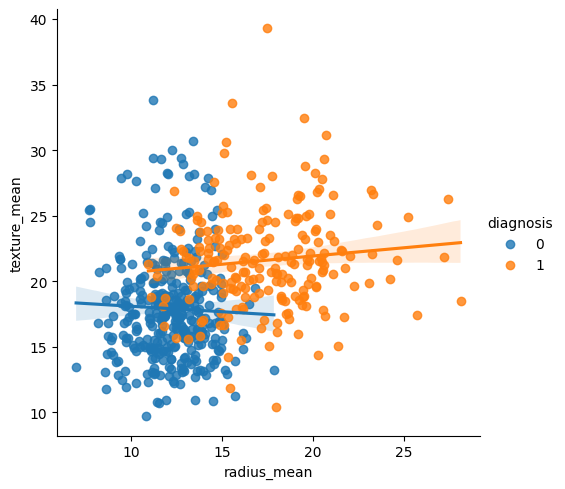

In [3]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = data) 


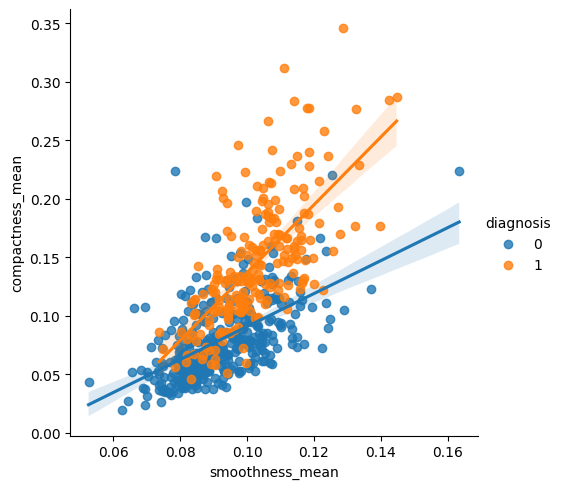

In [4]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', 
		data = data, hue = 'diagnosis') 


DỮ LIỆU HUẤN LUYỆN


In [5]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)

# Chuẩn hóa 
X = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))



In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
	X, y, test_size = 0.15, random_state = 42) 


HUẤN LUYỆN KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13) 
knn.fit(X_train, y_train).score(X_train, y_train)


0.9337474120082816

In [8]:
knn.score(X_test, y_test)

0.9534883720930233

XÁC THỰC CHÉO

In [9]:
neighbors = [] 
cv_scores = [] 

from sklearn.model_selection import cross_val_score 
# thực hiện xác nhận chéo 10 lần
for k in range(1, 51, 2): 
	neighbors.append(k) 
	knn = KNeighborsClassifier(n_neighbors = k) 
	scores = cross_val_score( 
		knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
	cv_scores.append(scores.mean()) 


The optimal number of neighbors is  15 


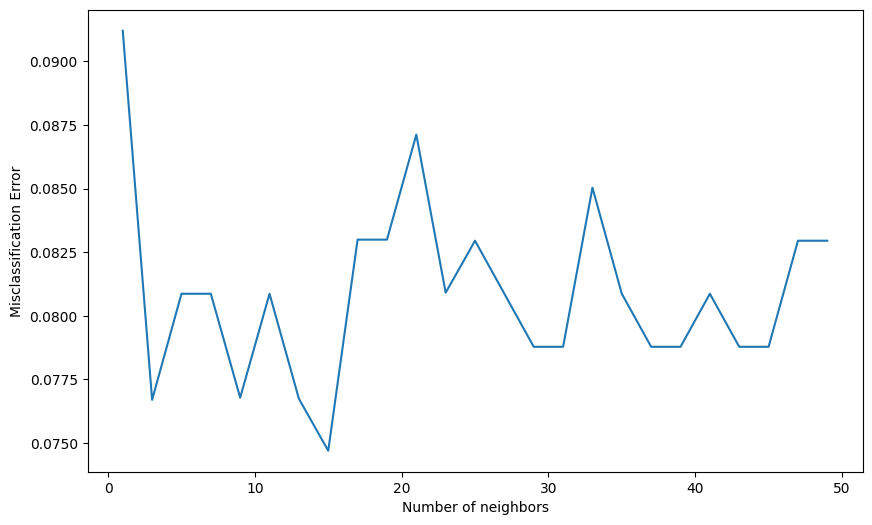

In [10]:
MSE = [1-x for x in cv_scores] 

# xác định k tốt nhất
optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 

# vẽ lỗi phân loại sai số k
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13) 
knn.fit(X_train, y_train).score(X_train, y_train)


0.9337474120082816

LƯU MÔ HÌNH

In [12]:
import joblib
joblib.dump(knn, 'knn.pkl')

['knn.pkl']